In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration


model_id = "google/paligemma-3b-pt-224"  # or any other specific PaliGemma model ID
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)
processor = AutoProcessor.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
import requests
from PIL import Image
import torch
import matplotlib.pyplot as plt
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


CUDA available: True
Device name: NVIDIA GeForce RTX 4080 SUPER


Using device: cuda


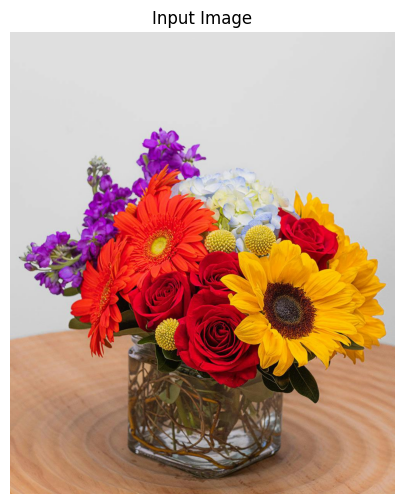



 What colors are on the flowers in this image?


red and yellow

In [12]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Move model to GPU
model = model.to(device)

image_file = "https://peoplesflowers.imgix.net/images/itemVariation/boldnbeautiful-24090921806.jpg"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(raw_image)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Define the question
question = """

<image> What colors are on the flowers in this image?

"""

# Move inputs to GPU
inputs = processor(images=raw_image, text=question, return_tensors="pt").to(device)

# Generate the answer with GPU acceleration
outputs = model.generate(
    **inputs,
    max_new_tokens=50,       # Allow more tokens for detailed output
    do_sample=True,           # Enable sampling
    temperature=0.7,          # Sampling temperature for diversity
    top_p=0.95,               # Top-p sampling for nucleus sampling
    num_beams=5,              # Beam search for structured output
    length_penalty=2.0,       # Encourage longer sentences
    repetition_penalty=1.3    # Penalize repetitive text
)

# Decode and print the answer
answer = processor.decode(outputs[0], skip_special_tokens=True)
from IPython.display import display_markdown
display_markdown(answer, raw=True)

[INFO] Loading the image...


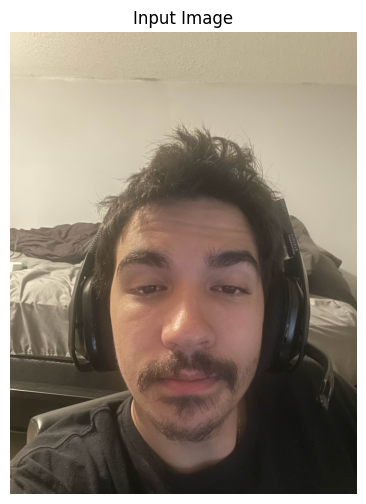

[INFO] Generating detailed outputs...

[INFO] Processing Prompt 1: <image> Describe the person's physical features in detail.


c:\Users\rbrul\Documents\GitHub\wip_test\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `1.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
c:\Users\rbrul\Documents\GitHub\wip_test\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Generated Detail 1:  Describe the person's physical features in detail.
hair

[INFO] Processing Prompt 2: <image> Describe the person's expression and what it might convey.
Generated Detail 2:  Describe the person's expression and what it might convey.
confused

[INFO] Processing Prompt 3: <image> Describe the background and surroundings of the image.
Generated Detail 3:  Describe the background and surroundings of the image.
background
[INFO] Combining generated details...

[RESULT] Final Generated Caption:
 Describe the person's physical features in detail.
hair  Describe the person's expression and what it might convey.
confused  Describe the background and surroundings of the image.
background


In [24]:
import matplotlib.pyplot as plt

# Display status update
def status_update(step):
    print(f"[INFO] {step}...")
    
# Step 2: Load the image
status_update("Loading the image")
image_url = "https://cdn.discordapp.com/attachments/428037777557422081/1328610766538018856/IMG_2256.jpg?ex=678754b3&is=67860333&hm=b7eef8db653f35d12b545536c02b249831f341e096b434d9e6fb02177a392e7d&"
image = Image.open(requests.get(image_url, stream=True).raw)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Step 3: Define the detailed prompts
prompts = [
    "<image> Describe the person's physical features in detail.",
    "<image> Describe the person's expression and what it might convey.",
    "<image> Describe the background and surroundings of the image."
]

# Step 4: Generate detailed outputs for each prompt
status_update("Generating detailed outputs")
detailed_captions = []
for i, prompt in enumerate(prompts):
    print(f"\n[INFO] Processing Prompt {i + 1}: {prompt}")
    inputs = processor(images=image, text=prompt, return_tensors="pt")
    output = model.generate(
        **inputs,
        max_new_tokens=100,
        temperature=1.5,
        top_p=0.9
    )
    detailed_caption = processor.decode(output[0], skip_special_tokens=True)
    detailed_captions.append(detailed_caption)
    print(f"Generated Detail {i + 1}: {detailed_caption}")

# Step 5: Combine the outputs
status_update("Combining generated details")
final_caption = " ".join(detailed_captions)

# Step 6: Display the combined caption
print("\n[RESULT] Final Generated Caption:")
print(final_caption)